# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
import mlxtend as mx
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, fbeta_score, roc_auc_score, roc_curve, precision_recall_curve, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV, KFold
import optuna
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.multiclass import OneVsRestClassifier


In [2]:
path = "C:\\Users\\ssriv\\Warlord\\data mining individual\\dataset\\CDC Diabetes Dataset.csv"

# DATA LOADING

In [3]:
df_import = pd.read_csv(path)

## CHECKING FOR DUPLICATES AND NANs

In [4]:
df_import.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
df_import.duplicated().sum()

23899

In [6]:
df_import = df_import.drop_duplicates()

In [7]:
df_import.duplicated().sum()

0

In [8]:
df_import.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## SPLITTING THE DATAFRAME INTO TRAINING AND TARGET FEATURES

In [9]:
X = df_import.drop(columns="Diabetes_012")

In [10]:
y = df_import["Diabetes_012"]

In [11]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [12]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    2.0
253677    0.0
253678    0.0
253679    2.0
Name: Diabetes_012, Length: 229781, dtype: float64

In [13]:
y.value_counts()

Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64

# SMOTE UNDER AND OVER SAMPLING FOR HANDLING CLASS IMBALANCE

In [14]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [15]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

counts = Counter(y_train_smote)

under_strategy = {
    0: int(counts[0] * 0.20),
    1: counts[1],   # keep all
    2: counts[2]    # keep all
}

undersampler = RandomUnderSampler(
    sampling_strategy=under_strategy,
    random_state=42
)

X_under, y_under = undersampler.fit_resample(X_train_smote, y_train_smote)

print("After undersampling:", Counter(y_under))


After undersampling: Counter({0.0: 30408, 2.0: 28078, 1.0: 3703})


In [ ]:

counts_under = Counter(y_under)

smote_strategy = {
    1: int(counts_under[1] * 7.0),
    2: int(counts_under[2] * 1.05)  
}

smote = SMOTE(
    sampling_strategy=smote_strategy,
    k_neighbors=min(5, counts_under[1] - 1),
    random_state=42
)

X_train_res, y_train_res = smote.fit_resample(X_under, y_under)

print("Final distribution:", Counter(y_train_res))


Final distribution: Counter({2.0: 42117, 0.0: 30408, 1.0: 25921})


# RFECV with RANDOM FOREST PIPELINE, with SMOTE SAMPLED DATA

In [38]:
f2_scorer = make_scorer(fbeta_score, beta=2, average='macro')

# 5-fold CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

pipe = Pipeline([
    ("rfecv", RFECV(
        estimator=RandomForestClassifier(
            n_estimators=1000,
            class_weight={
                0: 1.0,
                1: 3.0,
                2: 1.0
            },
            random_state=42,
            n_jobs=-1
        ),
        step=1,
        cv=cv,
        scoring=f2_scorer, 
        n_jobs=-1
    ))
])

# Fit
pipe.fit(X_train_res, y_train_res)

# Extract RFECV
rfecv = pipe.named_steps["rfecv"]

# Selected features
selected_features = X_train_res.columns[rfecv.support_]

# Feature importances
feature_importance = pd.DataFrame({
    "feature": selected_features,
    "importance": rfecv.estimator_.feature_importances_
}).sort_values("importance", ascending=False)

print(feature_importance)


                 feature  importance
3                    BMI    0.128636
18                   Age    0.106207
13               GenHlth    0.084703
20                Income    0.082017
0                 HighBP    0.065060
1               HighChol    0.063342
19             Education    0.062220
15              PhysHlth    0.056301
14              MentHlth    0.046713
4                 Smoker    0.042778
17                   Sex    0.041953
8                 Fruits    0.039214
7           PhysActivity    0.037301
9                Veggies    0.030614
16              DiffWalk    0.030239
6   HeartDiseaseorAttack    0.028400
12           NoDocbcCost    0.017533
5                 Stroke    0.012703
10     HvyAlcoholConsump    0.010381
11         AnyHealthcare    0.008774
2              CholCheck    0.004910


In [39]:
feature_cols = [c for c in X_train_res.columns]

In [40]:
feature_cols

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

## FITTING RFECV with TRAINING DATA

In [41]:
rfecv.fit(X_train_res, y_train_res)
 
print(" RFECV COMPLETE! \n")

print(f"\nOptimal number of features: {rfecv.n_features_}")
print(f"Features removed: {len(feature_cols) - rfecv.n_features_}")
print(f"\nBest cross-validation score (f2-score): {rfecv.cv_results_['mean_test_score'].max():.4f}")

 RFECV COMPLETE! 


Optimal number of features: 21
Features removed: 0

Best cross-validation score (f2-score): 0.7571


In [42]:
final_rf = rfecv.estimator_

### CHECKING THE SELECTED AND REMOVED FEATURES

In [43]:
# Get selected features
selected_features = [f for f, selected in zip(feature_cols, rfecv.support_) if selected]
removed_features = [f for f, selected in zip(feature_cols, rfecv.support_) if not selected]
 
print("Selected Features")
print("=" * 60)
print(f"Total selected: {len(selected_features)}\n")
for i, feat in enumerate(selected_features, 1):
    print(f"{i:2d}. {feat}")
 
print("\n" + "=" * 60)
print("Removed Features")
print("=" * 60)
print(f"Total removed: {len(removed_features)}\n")
for i, feat in enumerate(removed_features, 1):
    print(f"{i:2d}. {feat}")

Selected Features
Total selected: 21

 1. HighBP
 2. HighChol
 3. CholCheck
 4. BMI
 5. Smoker
 6. Stroke
 7. HeartDiseaseorAttack
 8. PhysActivity
 9. Fruits
10. Veggies
11. HvyAlcoholConsump
12. AnyHealthcare
13. NoDocbcCost
14. GenHlth
15. MentHlth
16. PhysHlth
17. DiffWalk
18. Sex
19. Age
20. Education
21. Income

Removed Features
Total removed: 0



### VISUALIZING THE OPTIMAL FEATURE SELECTION CURVE WITH MACRO F2 SCORES VS FEATURES

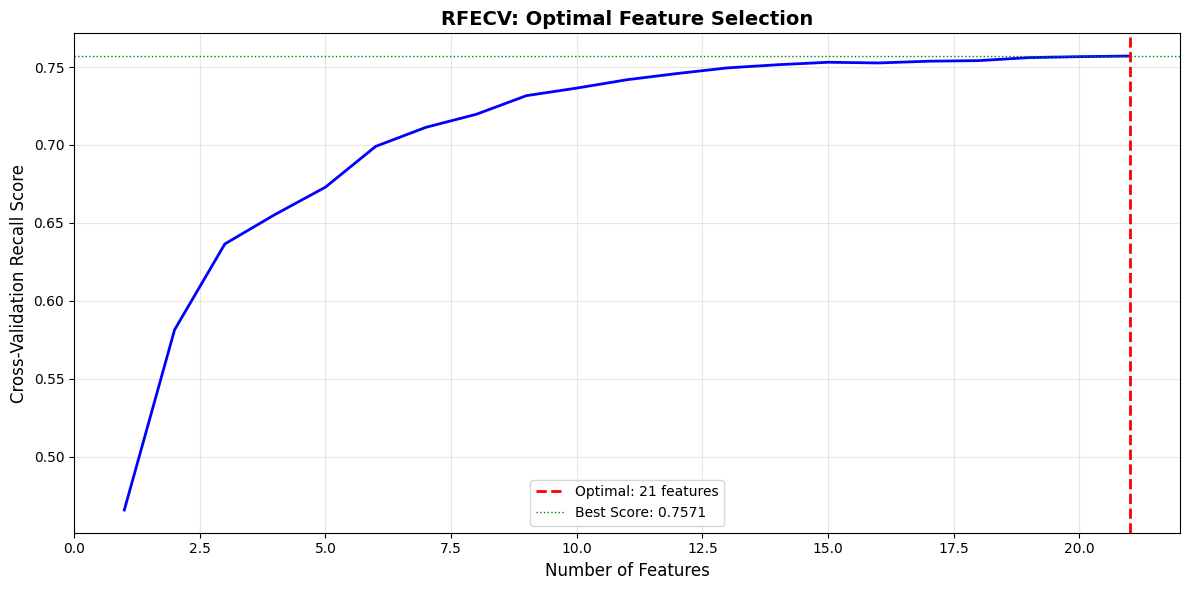

 Optimal features identified: 21


In [44]:
# Plot: Number of features vs Cross-validation score
plt.figure(figsize=(12, 6))
 
# Get scores for each number of features
n_features_range = range(1, len(rfecv.cv_results_['mean_test_score']) + 1)
scores = rfecv.cv_results_['mean_test_score']
 
plt.plot(n_features_range, scores, linewidth=2, color='blue')
plt.axvline(x=rfecv.n_features_, color='red', linestyle='--',
            label=f'Optimal: {rfecv.n_features_} features', linewidth=2)
plt.axhline(y=scores.max(), color='green', linestyle=':',
            label=f'Best Score: {scores.max():.4f}', linewidth=1)
 
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('Cross-Validation Recall Score', fontsize=12)
plt.title('RFECV: Optimal Feature Selection', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
 
print(f" Optimal features identified: {rfecv.n_features_}")

### VISUALIZING THE IMPORTANCE OF THE SELECTED FEATURES

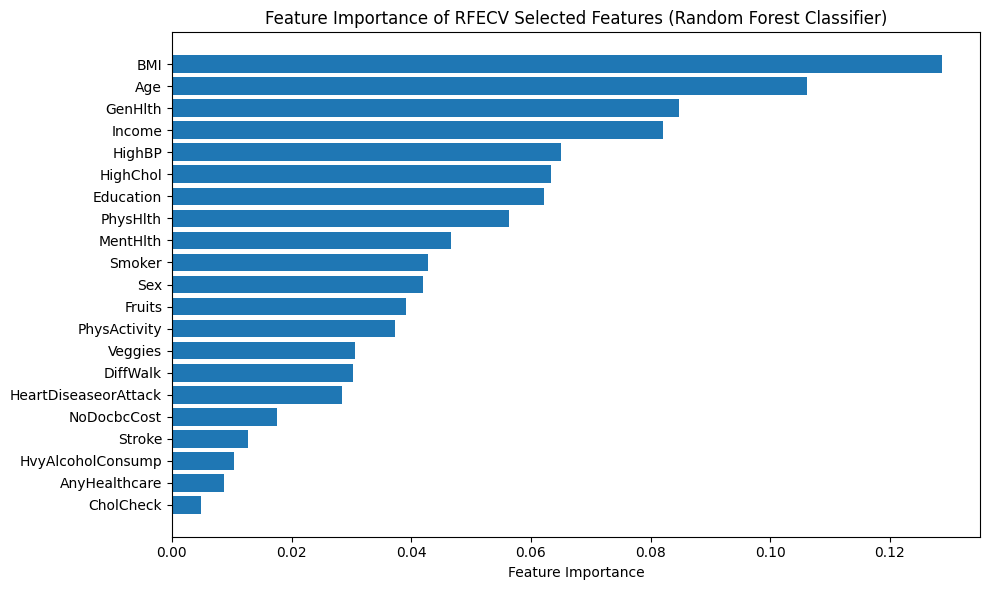

In [45]:

plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance["feature"],
    feature_importance["importance"]
)
plt.gca().invert_yaxis()  # Most important at top
plt.xlabel("Feature Importance")
plt.title("Feature Importance of RFECV Selected Features (Random Forest Classifier)")
plt.tight_layout()
plt.show()


In [46]:
feature_importance["feature"]

3                      BMI
18                     Age
13                 GenHlth
20                  Income
0                   HighBP
1                 HighChol
19               Education
15                PhysHlth
14                MentHlth
4                   Smoker
17                     Sex
8                   Fruits
7             PhysActivity
9                  Veggies
16                DiffWalk
6     HeartDiseaseorAttack
12             NoDocbcCost
5                   Stroke
10       HvyAlcoholConsump
11           AnyHealthcare
2                CholCheck
Name: feature, dtype: object

In [47]:
features_to_use = feature_importance["feature"]
X_train_model = X_train_res[features_to_use]

In [48]:
X_train_model

,BMI,Age,GenHlth,Income,HighBP,HighChol,Education,PhysHlth,MentHlth,Smoker,...,Fruits,PhysActivity,Veggies,DiffWalk,HeartDiseaseorAttack,NoDocbcCost,Stroke,HvyAlcoholConsump,AnyHealthcare,CholCheck
0,35.000000,4.000000,3.000000,7.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,1.0
1,29.000000,8.000000,2.000000,8.000000,1.000000,0.000000,5.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,1.0
2,27.000000,10.000000,3.000000,8.000000,0.000000,0.000000,6.000000,10.000000,0.000000,1.000000,...,1.000000,1.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,1.0
3,35.000000,9.000000,3.000000,8.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,...,1.000000,1.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,1.0
4,20.000000,6.000000,1.000000,8.000000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,1.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98441,31.000000,11.135443,1.864557,6.864557,1.000000,1.000000,5.000000,0.270885,0.000000,1.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,1.0
98442,32.000000,10.000000,2.250394,6.749606,0.000000,0.250394,5.250394,0.000000,15.000000,1.000000,...,0.749606,1.0,1.000000,0.749606,0.000000,0.0,0.000000,0.0,1.0,1.0
98443,35.000000,9.000000,3.000000,4.879414,0.120586,1.000000,3.120586,5.000000,4.879414,0.879414,...,0.879414,0.0,0.120586,0.000000,0.000000,0.0,0.000000,0.0,1.0,1.0
98444,35.483439,7.000000,2.516561,4.516561,1.000000,1.000000,4.483439,0.000000,2.483439,0.483439,...,1.000000,1.0,0.483439,0.000000,0.483439,0.0,0.000000,0.0,1.0,1.0


In [49]:
y_train_model = y_train_res

In [50]:
y_train_model

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
98441    2.0
98442    2.0
98443    2.0
98444    2.0
98445    2.0
Name: Diabetes_012, Length: 98446, dtype: float64

In [51]:
X_test_smote

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
251778,1.0,1.0,1.0,30.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,30.0,0.0,1.0,9.0,4.0,1.0
147101,0.0,0.0,1.0,24.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,6.0
151531,0.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,5.0,30.0,1.0,1.0,9.0,6.0,7.0
129092,1.0,1.0,1.0,27.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,3.0,15.0,0.0,1.0,0.0,7.0,5.0,3.0
192671,0.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,0.0,9.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180767,1.0,1.0,1.0,24.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,10.0,6.0,7.0
237947,1.0,1.0,1.0,19.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,1.0,8.0,5.0,2.0
78281,1.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,6.0,7.0
193438,1.0,0.0,1.0,37.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,3.0


In [52]:
y_test_smote

251778    2.0
147101    0.0
151531    0.0
129092    0.0
192671    2.0
         ... 
180767    2.0
237947    0.0
78281     0.0
193438    0.0
54020     0.0
Name: Diabetes_012, Length: 45957, dtype: float64

In [59]:
X_test_model = X_test_smote[features_to_use]

In [60]:
y_test_model = y_test_smote

# Random Forest MultiClass Classifier with Macro F2 Scoring and custom Class Weights wrapped on a One vs Rest strategy

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
f2_macro_scorer = make_scorer(fbeta_score, beta=2, average='macro')

def objective_rf_multiclass(trial):

    # --- TUNABLE CLASS WEIGHTS ---
    w1 = trial.suggest_float("weight_class_1", 2.0, 8.0)
    w2 = trial.suggest_float("weight_class_2", 1.5, 5.0)

    rf_params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 900),
        "max_depth": trial.suggest_int("max_depth", 6, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 15),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 8),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "class_weight": {
            0: 1.0,     # baseline
            1: w1,      # diabetic (MOST IMPORTANT)
            2: w2       # pre-diabetic
        },
        "random_state": 42,
        "n_jobs": -1
    }

    base_rf = RandomForestClassifier(**rf_params)

    ovr_rf = OneVsOneClassifier(
        base_rf,
        n_jobs=-1
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores = cross_val_score(
        ovr_rf,
        X_train_model,
        y_train_model,
        cv=cv,
        scoring=f2_macro_scorer,
        n_jobs=-1
    )

    return scores.mean()


study_rf = optuna.create_study(
    direction="maximize",
    study_name="RF_OvR_MacroF2_ClassWeightTuning"
)

study_rf.optimize(
    objective_rf_multiclass,
    n_trials=100,
    show_progress_bar=True
)

print("Best Macro F2:", study_rf.best_value)
print("Best params:", study_rf.best_params)



[I 2026-02-05 21:11:18,522] A new study created in memory with name: RF_OvR_MacroF2_ClassWeightTuning


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-02-05 21:12:05,167] Trial 0 finished with value: 0.7425798779166077 and parameters: {'weight_class_1': 6.440702285745724, 'weight_class_2': 4.874782877162186, 'n_estimators': 445, 'max_depth': 19, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7425798779166077.
[I 2026-02-05 21:12:39,717] Trial 1 finished with value: 0.6589490732162413 and parameters: {'weight_class_1': 2.0046593446897853, 'weight_class_2': 1.7034985740284319, 'n_estimators': 548, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7425798779166077.
[I 2026-02-05 21:13:57,121] Trial 2 finished with value: 0.7041873601094452 and parameters: {'weight_class_1': 3.5324259786738725, 'weight_class_2': 1.624088087953144, 'n_estimators': 872, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: 0.7425798779166077.
[I 2026-02-05 21:15:12

In [74]:
best_params = study_rf.best_params.copy()

# Extract class weights
w1 = best_params.pop("weight_class_1")
w2 = best_params.pop("weight_class_2")


In [75]:
best_rf_class = OneVsRestClassifier(
    RandomForestClassifier(
        **best_params,
        class_weight={
            0: 1.0,
            1: w1,   # diabetic
            2: w2    # pre-diabetic
        },
        random_state=42,
        n_jobs=-1
    ),
    n_jobs=-1
)

best_rf_class.fit(X_train_model, y_train_model)

,estimator,RandomForestC...ndom_state=42)
,n_jobs,-1
,verbose,0
,n_estimators,527
,criterion,'gini'
,max_depth,20
,min_samples_split,4
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None


## Evaluation of Random Forest MultiClass Classifier with Macro F2 Scoring and custom Class Weights

In [ ]:
y_pred_rf_class = best_rf_class.predict(X_test_model)
y_proba_rf      = best_rf_class.predict_proba(X_test_model)

acc_rf = accuracy_score(y_test_model, y_pred_rf_class)
pre_rf = precision_score(y_test_model, y_pred_rf_class, average='macro')
rec_rf = recall_score(y_test_model, y_pred_rf_class, average='macro')
f1_rf  = f1_score(y_test_model, y_pred_rf_class, average='macro')
f2_rf  = fbeta_score(y_test_model, y_pred_rf_class, beta=2, average='macro')

roc_rf = roc_auc_score(
    y_test_model,
    y_proba_rf,
    multi_class='ovr',
    average='macro'
)

print(f"Accuracy  : {acc_rf:.4f}")
print(f"Precision : {pre_rf:.4f}")
print(f"Recall    : {rec_rf:.4f}")
print(f"F1 Score  : {f1_rf:.4f}")
print(f"F2 Score  : {f2_rf:.4f}")
print(f"ROC AUC   : {roc_rf:.4f}")


Accuracy  : 0.6965
Precision : 0.4466
Recall    : 0.4952
F1 Score  : 0.4164
F2 Score  : 0.4468
ROC AUC   : 0.7434


In [83]:
def apply_thresholds(proba, t1=0.12, t2=0.35):
    y_pred = []

    for p0, p1, p2 in proba:
        if p1 >= t1:
            y_pred.append(1)
        elif p2 >= t2:
            y_pred.append(2)
        else:
            y_pred.append(0)

    return np.array(y_pred)


In [84]:
THRESHOLD_CLASS_1 = 0.25   # diabetic
THRESHOLD_CLASS_2 = 0.30   # pre-diabetic


In [85]:
y_pred_thresh = apply_thresholds(
    y_proba_rf,
    t1=0.12,
    t2=0.35
)

print(confusion_matrix(y_test_model, y_pred_thresh))

print("Macro Recall:", recall_score(y_test_model, y_pred_thresh, average="macro"))
print("Macro F2    :", fbeta_score(y_test_model, y_pred_thresh, beta=2, average="macro"))


[[17367  9200 11445]
 [  131   345   450]
 [  493  2289  4237]]
Macro Recall: 0.4776998249442934
Macro F2    : 0.36696900624831724


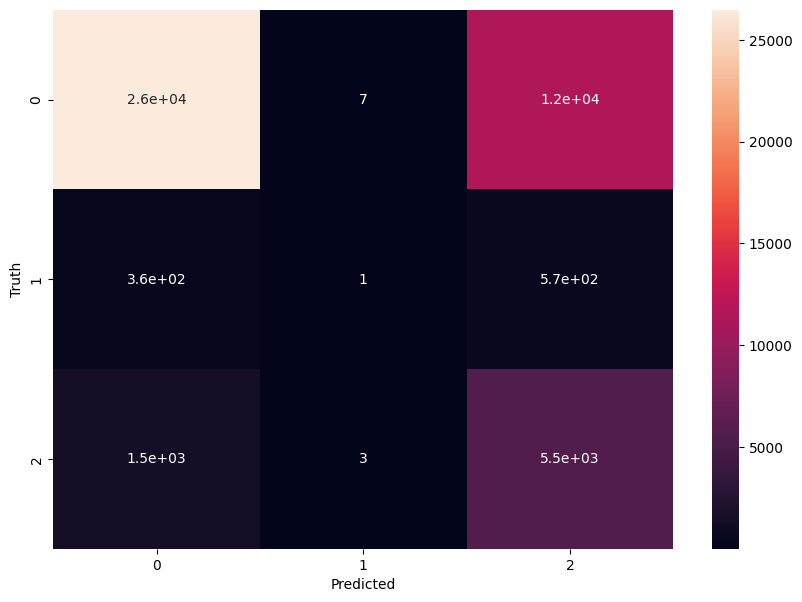

In [77]:
cm = confusion_matrix(y_test_model, y_pred_rf_class)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [78]:
print(cm)

[[26477     7 11528]
 [  355     1   570]
 [ 1485     3  5531]]


# Random Forest MultiClass Classifier with Macro F2 Scoring and custom Class Weights

In [87]:
# Define scorer globally so it's not recreated every trial
f2_macro_scorer1 = make_scorer(fbeta_score, beta=2, average='macro')

def objective_rf_multiclass1(trial):
    # --- TUNABLE CLASS WEIGHTS ---
    # Tuning weights helps balance the trade-off between classes
    w1 = trial.suggest_float("weight_class_1", 3.0, 8.0)  # Diabetic
    w2 = trial.suggest_float("weight_class_2", 1.5, 3.0)  # Pre-diabetic

    rf_params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 1000),
        "max_depth": trial.suggest_int("max_depth", 6, 25),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 15),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 8),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        
        # Native Multiclass Weighting
        "class_weight": {
            0: 1.0,     # Baseline
            1: w1,      # Diabetic (High priority)
            2: w2       # Pre-diabetic
        },
        "random_state": 42,
        
        # Disable inner parallelism to avoid conflict with cross_val_score
        "n_jobs": 1 
    }

    # Initialize Native RF (No OneVsOne Wrapper needed)
    model_rf = RandomForestClassifier(**rf_params)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores = cross_val_score(
        model_rf,
        X_train_model,
        y_train_model,
        cv=cv,
        scoring=f2_macro_scorer,
        
        # Use parallelism ONLY here (outer loop)
        n_jobs=-1  
    )

    return scores.mean()

# --- OPTUNA STUDY ---
study_rf1 = optuna.create_study(
    direction="maximize",
    study_name="RF_Native_MacroF2_Optimization"
)

study_rf1.optimize(
    objective_rf_multiclass1, 
    n_trials=100, 
    show_progress_bar=True
)

print("Best Macro F2:", study_rf1.best_value)
print("Best params:", study_rf1.best_params)

[I 2026-02-05 23:15:16,941] A new study created in memory with name: RF_Native_MacroF2_Optimization


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-02-05 23:15:54,966] Trial 0 finished with value: 0.6345929108055828 and parameters: {'weight_class_1': 6.201212905241809, 'weight_class_2': 2.5334899886349653, 'n_estimators': 676, 'max_depth': 13, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6345929108055828.
[I 2026-02-05 23:16:25,652] Trial 1 finished with value: 0.5770778319246558 and parameters: {'weight_class_1': 4.757370454263166, 'weight_class_2': 2.667895838869377, 'n_estimators': 747, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6345929108055828.
[I 2026-02-05 23:16:52,884] Trial 2 finished with value: 0.6858239795388167 and parameters: {'weight_class_1': 4.297598192182301, 'weight_class_2': 2.4328797004011187, 'n_estimators': 405, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.6858239795388167.
[I 2026-02-05 23:17:33,

In [88]:
best_params = study_rf1.best_params.copy()

w1 = best_params.pop("weight_class_1")
w2 = best_params.pop("weight_class_2")

best_rf_class1 = RandomForestClassifier(
    **best_params,
    class_weight={
        0: 1.0,
        1: w1,
        2: w2
    },
    random_state=42,
    n_jobs=-1
)

best_rf_class1.fit(X_train_model, y_train_model)


,n_estimators,356
,criterion,'gini'
,max_depth,23
,min_samples_split,3
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Evaluation of Random Forest MultiClass Classifier with Macro F2 Scoring and custom Class Weights

In [118]:
y_pred_rf_class1 = best_rf_class1.predict(X_test_model)
y_proba_rf1      = best_rf_class1.predict_proba(X_test_model)
acc_rf1 = accuracy_score(y_test_model, y_pred_rf_class1)
pre_rf1 = precision_score(y_test_model, y_pred_rf_class1, average='macro')
rec_rf1 = recall_score(y_test_model, y_pred_rf_class1, average='macro')
f1_rf1  = f1_score(y_test_model, y_pred_rf_class1, average='macro')
f2_rf1  = fbeta_score(y_test_model, y_pred_rf_class1, beta=2, average='macro')
roc_rf1 = roc_auc_score(
    y_test_model,
    y_proba_rf1,
    multi_class='ovr',
    average='macro'
)
print(f"Accuracy  : {acc_rf1:.4f}")
print(f"Precision : {pre_rf1:.4f}")
print(f"Recall    : {rec_rf1:.4f}")
print(f"F1 Score  : {f1_rf1:.4f}")
print(f"F2 Score  : {f2_rf1:.4f}")
print(f"ROC AUC   : {roc_rf1:.4f}")

Accuracy  : 0.6548
Precision : 0.4271
Recall    : 0.4962
F1 Score  : 0.4106
F2 Score  : 0.4400
ROC AUC   : 0.7318


In [95]:
y_pred_thresh1 = apply_thresholds(
    y_proba_rf1,
    t1=0.12,
    t2=0.35
)
print(confusion_matrix(y_test_model, y_pred_thresh1))
print("Macro Recall:", recall_score(y_test_model, y_pred_thresh1, average="macro"))
print("Macro F2    :", fbeta_score(y_test_model, y_pred_thresh1, beta=2, average="macro"))


[[15722 12652  9638]
 [  110   422   394]
 [  413  2836  3770]]
Macro Recall: 0.46881444022230917
Macro F2    : 0.34159841537094776


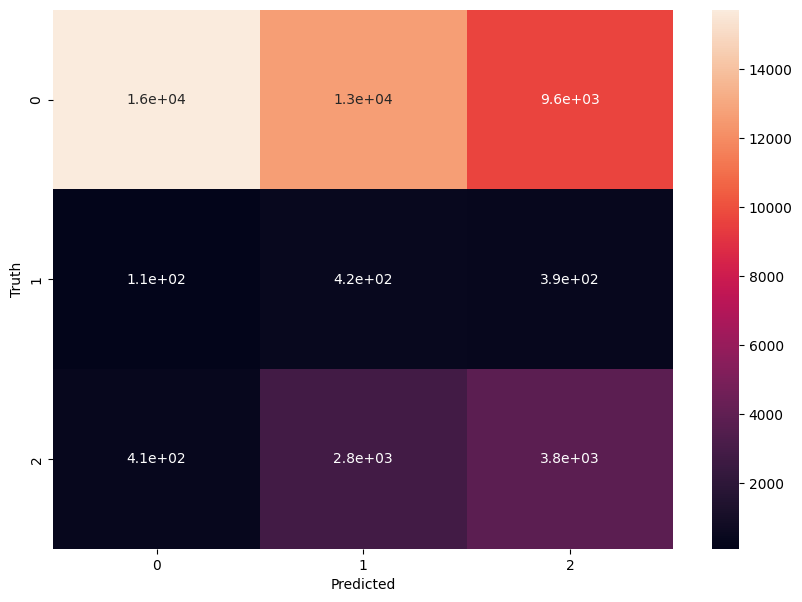

In [96]:
cm1 = confusion_matrix(y_test_model, y_pred_thresh1)
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [97]:
print(cm1)

[[15722 12652  9638]
 [  110   422   394]
 [  413  2836  3770]]


# XGBoost MultiClass Classifier with Macro F2 Scoring and custom sample class weights

In [102]:
from sklearn.utils.class_weight import compute_sample_weight
def objective_xgb_multiclass(trial):

    # --- Tunable class weights ---
    w1 = trial.suggest_float("weight_class_1", 3.0, 8.0)  # diabetic
    w2 = trial.suggest_float("weight_class_2", 1.5, 3.0)  # pre-diabetic

    # Hyperparameters
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 30),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "objective": "multi:softprob",
        "num_class": 3,
        "random_state": 42,
        "n_jobs": -1
    }

    # Prepare sample weights
    class_weights = {0: 1.0, 1: w1, 2: w2}
    sample_weights = compute_sample_weight(class_weights, y_train_model)

    # Stratified KFold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in cv.split(X_train_model, y_train_model):
        X_tr, X_val = X_train_model.iloc[train_idx], X_train_model.iloc[val_idx]
        y_tr, y_val = y_train_model.iloc[train_idx], y_train_model.iloc[val_idx]
        sw_tr = sample_weights[train_idx]

        model = XGBClassifier(**params)
        model.fit(X_tr, y_tr, sample_weight=sw_tr)
        y_pred = model.predict(X_val)

        score = fbeta_score(y_val, y_pred, beta=2, average='macro')
        scores.append(score)

    return np.mean(scores)


# --- Optuna study ---
study_xgb = optuna.create_study(
    direction="maximize",
    study_name="XGB_MacroF2_Multiclass"
)

study_xgb.optimize(
    objective_xgb_multiclass,
    n_trials=100,
    show_progress_bar=True
)

print("Best Macro F2:", study_xgb.best_value)
print("Best params:", study_xgb.best_params)


[I 2026-02-06 01:34:07,301] A new study created in memory with name: XGB_MacroF2_Multiclass


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-02-06 01:36:42,410] Trial 0 finished with value: 0.7666569393577096 and parameters: {'weight_class_1': 4.846414419200038, 'weight_class_2': 1.918556114565238, 'n_estimators': 315, 'max_depth': 26, 'learning_rate': 0.06458963280087152, 'subsample': 0.6890019324428687, 'colsample_bytree': 0.7609774189533837, 'gamma': 0.18079601212085517, 'min_child_weight': 1}. Best is trial 0 with value: 0.7666569393577096.
[I 2026-02-06 01:42:15,681] Trial 1 finished with value: 0.7569410120396849 and parameters: {'weight_class_1': 5.521309071860127, 'weight_class_2': 2.3820809113895387, 'n_estimators': 841, 'max_depth': 24, 'learning_rate': 0.02423692798546546, 'subsample': 0.9289060540191298, 'colsample_bytree': 0.6060264908222193, 'gamma': 0.2703866687429751, 'min_child_weight': 1}. Best is trial 0 with value: 0.7666569393577096.
[I 2026-02-06 01:42:47,564] Trial 2 finished with value: 0.7208820957475498 and parameters: {'weight_class_1': 5.879442053439598, 'weight_class_2': 2.09622750325641

In [ ]:
best_params_xgb = study_xgb.best_params.copy()

# REMOVE Optuna-only params
w1 = best_params_xgb.pop("weight_class_1")
w2 = best_params_xgb.pop("weight_class_2")

# Compute sample weights
sample_weights = compute_sample_weight(
    {0: 1.0, 1: w1, 2: w2},
    y_train_model
)

# Train final model
best_xgb_class = XGBClassifier(
    **best_params_xgb,
    objective="multi:softprob",
    num_class=3,
    random_state=42,
    n_jobs=-1
)

best_xgb_class.fit(
    X_train_model,
    y_train_model,
    sample_weight=sample_weights
)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7431037024640936
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


## Evaluation of XGBoost MultiClass Classifier with Macro F2 Scoring and custom sample class weights

In [106]:
y_pred_xgb_class = best_xgb_class.predict(X_test_model)
y_proba_xgb      = best_xgb_class.predict_proba(X_test_model)
acc_xgb          = accuracy_score(y_test_model, y_pred_xgb_class)
pre_xgb          = precision_score(y_test_model, y_pred_xgb_class, average='macro')
rec_xgb          = recall_score(y_test_model, y_pred_xgb_class, average='macro')
f1_xgb           = f1_score(y_test_model, y_pred_xgb_class, average='macro')
f2_xgb           = fbeta_score(y_test_model, y_pred_xgb_class, beta=2, average='macro')
roc_xgb          = roc_auc_score(
    y_test_model,
    y_proba_xgb,
    multi_class='ovr',
    average='macro'
)
print(f"Accuracy  : {acc_xgb:.4f}")
print(f"Precision : {pre_xgb:.4f}")
print(f"Recall    : {rec_xgb:.4f}")
print(f"F1 Score  : {f1_xgb:.4f}")
print(f"F2 Score  : {f2_xgb:.4f}")
print(f"ROC AUC   : {roc_xgb:.4f}")

Accuracy  : 0.6542
Precision : 0.4151
Recall    : 0.4785
F1 Score  : 0.3986
F2 Score  : 0.4263
ROC AUC   : 0.7097


In [113]:
y_pred_thresh_xgb = apply_thresholds(
    y_proba_xgb,
    t1=0.05,
    t2=0.40
)
print(confusion_matrix(y_test_model, y_pred_thresh_xgb))
print("Macro Recall:", recall_score(y_test_model, y_pred_thresh_xgb, average="macro"))
print("Macro F2    :", fbeta_score(y_test_model, y_pred_thresh_xgb, beta=2, average="macro"))


[[21023  4382 12607]
 [  227   154   545]
 [ 1043   954  5022]]
Macro Recall: 0.47828514096503943
Macro F2    : 0.4098655955845767


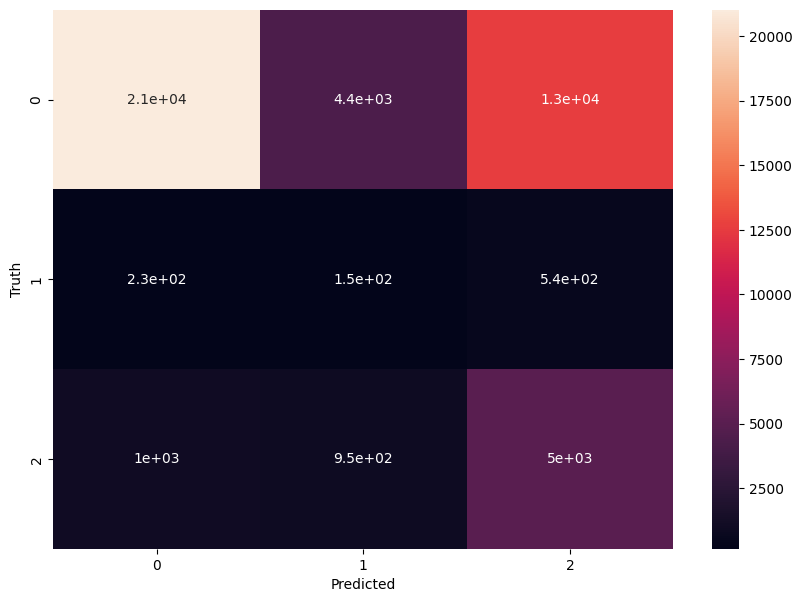

In [114]:
cm_xgb = confusion_matrix(y_test_model, y_pred_thresh_xgb)
plt.figure(figsize=(10,7))
sns.heatmap(cm_xgb, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [115]:
X_train_model.columns

Index(['BMI', 'Age', 'GenHlth', 'Income', 'HighBP', 'HighChol', 'Education',
       'PhysHlth', 'MentHlth', 'Smoker', 'Sex', 'Fruits', 'PhysActivity',
       'Veggies', 'DiffWalk', 'HeartDiseaseorAttack', 'NoDocbcCost', 'Stroke',
       'HvyAlcoholConsump', 'AnyHealthcare', 'CholCheck'],
      dtype='object')

In [117]:
X_train_model.head(15)

,BMI,Age,GenHlth,Income,HighBP,HighChol,Education,PhysHlth,MentHlth,Smoker,...,Fruits,PhysActivity,Veggies,DiffWalk,HeartDiseaseorAttack,NoDocbcCost,Stroke,HvyAlcoholConsump,AnyHealthcare,CholCheck
0,35.0,4.0,3.0,7.0,0.0,1.0,6.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,29.0,8.0,2.0,8.0,1.0,0.0,5.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,27.0,10.0,3.0,8.0,0.0,0.0,6.0,10.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,35.0,9.0,3.0,8.0,0.0,0.0,5.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,20.0,6.0,1.0,8.0,0.0,0.0,6.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,24.0,7.0,2.0,7.0,1.0,1.0,5.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,27.0,9.0,5.0,5.0,1.0,1.0,5.0,30.0,3.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
7,27.0,7.0,3.0,3.0,0.0,0.0,5.0,5.0,10.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,38.0,10.0,2.0,5.0,0.0,1.0,5.0,0.0,5.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
9,28.0,9.0,4.0,5.0,0.0,0.0,3.0,14.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [124]:
def objective_xgb_multiclass(trial):

    xgb_params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 10),

        # IMPORTANT
        "objective": "binary:logistic",  # OvR → binary per class
        "eval_metric": "logloss",
        "tree_method": "hist",
        "random_state": 42,
        "n_jobs": -1
    }

    base_xgb = XGBClassifier(**xgb_params)
    model = OneVsRestClassifier(base_xgb)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores = cross_val_score(
        model,
        X_train_model,
        y_train_model,
        cv=cv,
        scoring=f2_macro_scorer,
        n_jobs=-1
    )

    return scores.mean()

study_xgb_ovr = optuna.create_study(
    direction="maximize",
    study_name="XGB_OvR_MacroF2"
)

study_xgb_ovr.optimize(
    objective_xgb_multiclass,
    n_trials=100,
    show_progress_bar=True
)

print("Best Macro F2:", study_xgb_ovr.best_value)
print("Best params:", study_xgb_ovr.best_params)



[I 2026-02-08 11:05:10,008] A new study created in memory with name: XGB_OvR_MacroF2


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-02-08 11:05:43,522] Trial 0 finished with value: 0.7213664925636543 and parameters: {'n_estimators': 974, 'max_depth': 6, 'learning_rate': 0.03248174124910239, 'subsample': 0.9611292894587031, 'colsample_bytree': 0.6110187205992252, 'min_child_weight': 1, 'gamma': 1.724606667232937, 'reg_alpha': 0.41626636858377863, 'reg_lambda': 8.93542201077667}. Best is trial 0 with value: 0.7213664925636543.
[I 2026-02-08 11:06:17,327] Trial 1 finished with value: 0.7109912039441719 and parameters: {'n_estimators': 758, 'max_depth': 5, 'learning_rate': 0.015612566117928496, 'subsample': 0.6306064847005917, 'colsample_bytree': 0.7973727740923144, 'min_child_weight': 8, 'gamma': 2.638082902737038, 'reg_alpha': 4.45160178818782, 'reg_lambda': 1.7651648310515484}. Best is trial 0 with value: 0.7213664925636543.
[I 2026-02-08 11:06:33,355] Trial 2 finished with value: 0.7098350371700494 and parameters: {'n_estimators': 552, 'max_depth': 4, 'learning_rate': 0.08671244100076805, 'subsample': 0.906

In [126]:
# Best params from Optuna
best_params_xgb_ovr = study_xgb_ovr.best_params.copy()

# Build base binary XGBoost (OvR expects binary)
base_xgb_1 = XGBClassifier(
    **best_params_xgb_ovr,
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

# Wrap with One-vs-Rest
best_xgb_ovr = OneVsRestClassifier(
    base_xgb_1,
    n_jobs=-1
)

# Fit on full training data
best_xgb_ovr.fit(
    X_train_model,
    y_train_model
)


,estimator,"XGBClassifier...ree=None, ...)"
,n_jobs,-1
,verbose,0
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9667005553164629
,device,None


In [128]:
y_pred_xgb_class_ovr = best_xgb_ovr.predict(X_test_model)
y_proba_xgb_ovr      = best_xgb_ovr.predict_proba(X_test_model)
acc_xgb_ovr          = accuracy_score(y_test_model, y_pred_xgb_class_ovr)
pre_xgb_ovr          = precision_score(y_test_model, y_pred_xgb_class_ovr, average='macro')
rec_xgb_ovr          = recall_score(y_test_model, y_pred_xgb_class_ovr, average='macro')
f1_xgb_ovr           = f1_score(y_test_model, y_pred_xgb_class_ovr, average='macro')
f2_xgb_ovr           = fbeta_score(y_test_model, y_pred_xgb_class_ovr, beta=2, average='macro')
roc_xgb_ovr          = roc_auc_score(
    y_test_model,
    y_proba_xgb_ovr,
    multi_class='ovr',
    average='macro'
)
print(f"Accuracy  : {acc_xgb_ovr:.4f}")
print(f"Precision : {pre_xgb_ovr:.4f}")
print(f"Recall    : {rec_xgb_ovr:.4f}")
print(f"F1 Score  : {f1_xgb_ovr:.4f}")
print(f"F2 Score  : {f2_xgb_ovr:.4f}")
print(f"ROC AUC   : {roc_xgb_ovr:.4f}")

Accuracy  : 0.6959
Precision : 0.4222
Recall    : 0.4822
F1 Score  : 0.4164
F2 Score  : 0.4420
ROC AUC   : 0.7128


In [129]:
y_pred_thresh_xgb_ovr = apply_thresholds(
    y_proba_xgb_ovr,
    t1=0.05,
    t2=0.40
)
print(confusion_matrix(y_test_model, y_pred_thresh_xgb_ovr))
print("Macro Recall:", recall_score(y_test_model, y_pred_thresh_xgb_ovr, average="macro"))
print("Macro F2    :", fbeta_score(y_test_model, y_pred_thresh_xgb_ovr, beta=2, average="macro"))


[[19409  8488 10115]
 [  205   276   445]
 [  865  1954  4200]]
Macro Recall: 0.4690113025686859
Macro F2    : 0.3828068884194165


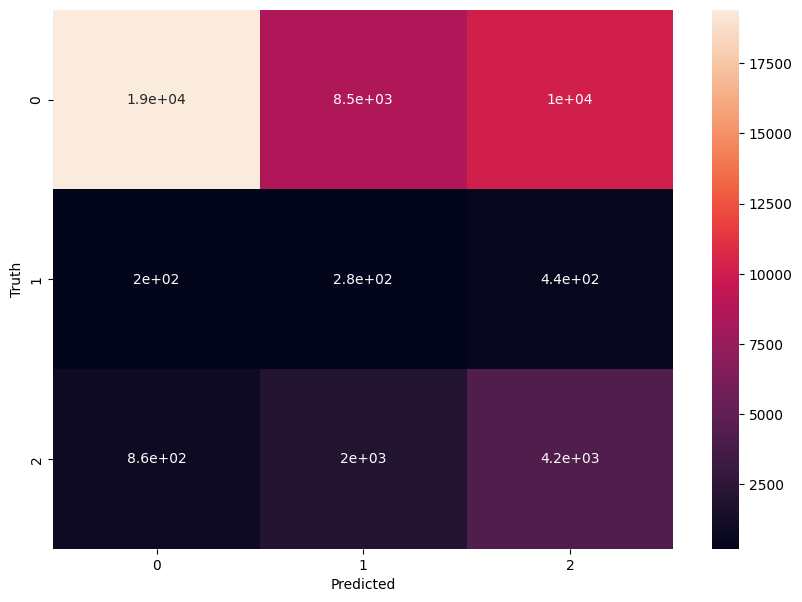

In [130]:
cm_xgb_ovr = confusion_matrix(y_test_model, y_pred_thresh_xgb_ovr)
plt.figure(figsize=(10,7))
sns.heatmap(cm_xgb_ovr, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Clustering Algorithms

## K Means Clustering

### Visualizing the K Means Clustering Results

## DBSCAN Clustering

### Visualizing the DBSCAN Clustering Results

## Hierarchical Clustering

### Visualizing the Hierarchical Clustering Results